In [2]:
import numpy as np
import ast
import matplotlib.pyplot as plt


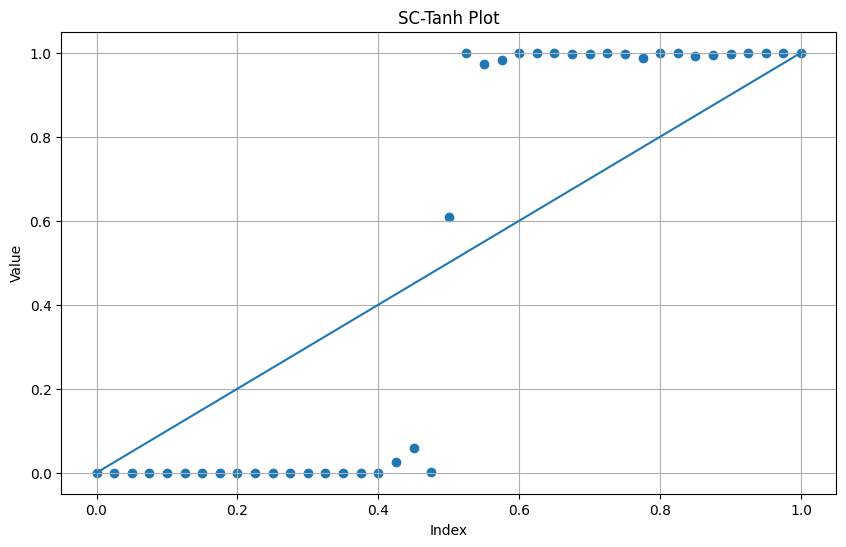

In [3]:
# test_tanh

file_path = "out_tanh.txt"  
with open(file_path, 'r') as file:
    content = file.read()
    array_strings = content.split('\n')  # Assuming the arrays are separated by two newlines

array1 = ast.literal_eval(array_strings[0])
array2 = ast.literal_eval(array_strings[1])
plt.figure(figsize=(10, 6))
plt.scatter(array1, array2)
plt.plot(array1, array1)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SC-Tanh Plot')
plt.grid()
plt.show()


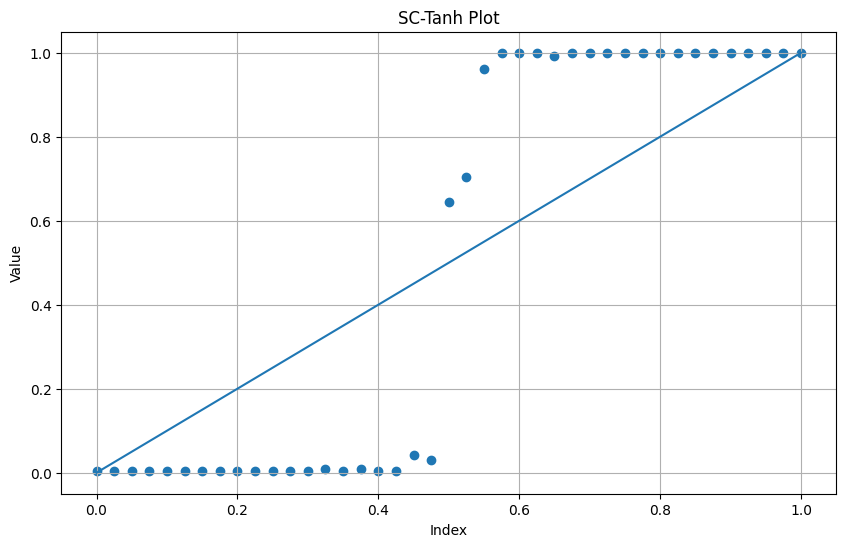

In [25]:
# test_apc_neuron

file_path = "out_apc_neuron.txt"  
with open(file_path, 'r') as file:
    content = file.read()
    array_strings = content.split('\n')  # Assuming the arrays are separated by two newlines

array1 = ast.literal_eval(array_strings[0])
array2 = ast.literal_eval(array_strings[1])
plt.figure(figsize=(10, 6))
plt.scatter(array1, array2)
plt.plot(array1, array1)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SC-Tanh Plot')
plt.grid()
plt.show()


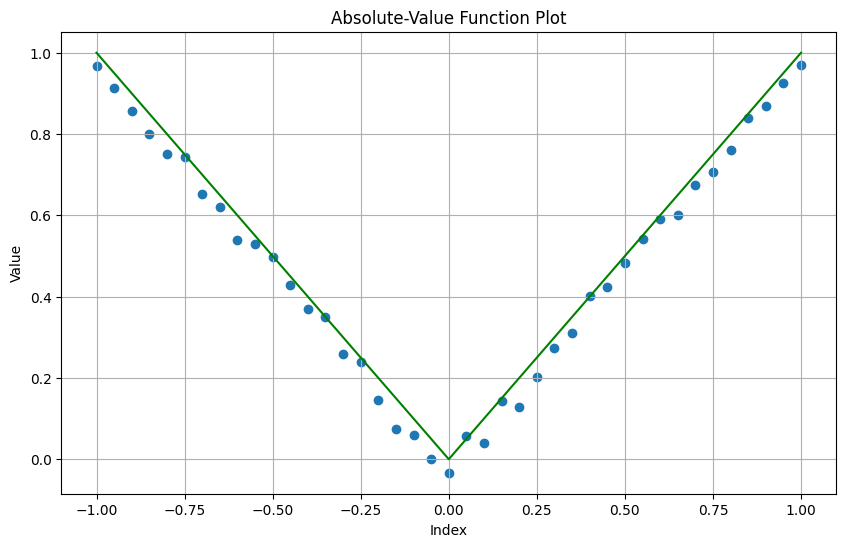

In [22]:
# test_abs

file_path = "out_abs.txt"  
with open(file_path, 'r') as file:
    content = file.read()
    array_strings = content.split('\n')  # Assuming the arrays are separated by two newlines

array1 = ast.literal_eval(array_strings[0])
array1 = np.array(array1)
array2 = ast.literal_eval(array_strings[1])
array2 = np.array(array2)
plt.figure(figsize=(10, 6))
plt.scatter(2*array1 - 1, 2*array2 - 1)
plt.plot(2*array1 - 1, np.abs(2*array1 - 1), "g")
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Absolute-Value Function Plot')
plt.grid()
plt.show()

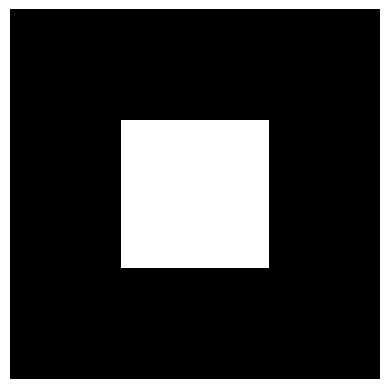

In [5]:
def create_bw_test_image(image_size=(100, 100), square_size=40):
    # Create a simple black and white image
    image = np.zeros(image_size, dtype=np.uint8)  # Black background

    # Draw a white square in the center
    start_x = (image_size[0] - square_size) // 2
    start_y = (image_size[1] - square_size) // 2
    image[start_x:start_x+square_size, start_y:start_y+square_size] = 255  # White square

    return image

image = create_bw_test_image()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()



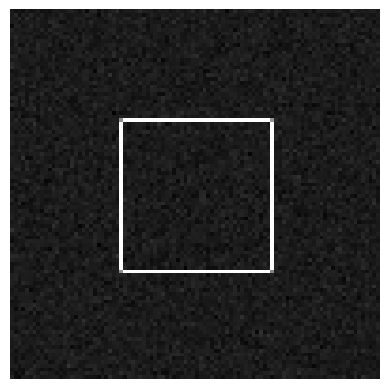

In [6]:
file_path = "out_edge_detect.txt"  
with open(file_path, 'r') as file:
    content = file.read()

array_image = ast.literal_eval(content)
array_image = (np.array(array_image))* 255
plt.imshow(array_image, cmap='gray')
plt.axis('off')
plt.show()

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

# Load the MNIST dataset
(train_images, train_labels), (_, _) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

# Define a simple neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the MNIST dataset
model.fit(train_images, train_labels, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2606 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1144 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0786 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0593 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0454 - accuracy: 0.9860


In [43]:
# Get the weights of each layer into 1D arrays
layer_weights = []

for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        weights = layer.get_weights()
        if weights:
            layer_weights.append(weights[0]) # the np.array of weights is wrapped around a list. So weights[0].

# Print the weights of each layer
for i, weights in enumerate(layer_weights):
    print(f'Layer {i + 1} weights shape: {weights.shape}')

Layer 1 weights shape: (784, 128)
Layer 2 weights shape: (128, 10)


In [45]:
for i, weights in enumerate(layer_weights):
    # print(f'Layer {i + 1} weights shape: {weights[0:1000]}')

    if np.all((weights >= -1)) & np.all((weights <= 1)):
        print(f'Layer {i + 1} weights are within range (-1, 1)')
    else:
        print(f'Layer {i + 1} weights are NOT within range (-1, 1)')

# print(sorted(layer_weights[1]))

Layer 1 weights are within range (-1, 1)
Layer 2 weights are NOT within range (-1, 1)


In [48]:
layer_weights

[array([[-0.00835819,  0.07764924, -0.0548714 , ...,  0.03116222,
         -0.06963296,  0.06295458],
        [ 0.01472511,  0.05998526,  0.07710455, ...,  0.07233641,
         -0.05092057,  0.02346796],
        [-0.07962628, -0.05278136, -0.03778632, ...,  0.01846266,
         -0.07451894, -0.00585013],
        ...,
        [-0.04532526,  0.03006236, -0.06062605, ..., -0.06083746,
         -0.03552722, -0.06810673],
        [-0.08064374,  0.03144686, -0.00878183, ..., -0.00452418,
          0.00400633, -0.02272403],
        [-0.03459976, -0.06183412, -0.04115554, ...,  0.03462521,
          0.05319504,  0.04631322]], dtype=float32),
 array([[-0.3414    , -0.21252106, -0.25470352, ...,  0.08945192,
          0.01921253,  0.10658632],
        [ 0.0638211 ,  0.24539877,  0.1816607 , ..., -0.07828388,
          0.11416367, -0.20883153],
        [ 0.17862798, -0.1637094 ,  0.06579985, ..., -0.15177256,
         -0.09213011,  0.23393203],
        ...,
        [ 0.2076605 , -0.14200056, -0.0

In [68]:
import random
func = np.vectorize(lambda x: int(random.random() < x))
func(layer_weights[0])


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [70]:
import numpy as np

# Create a NumPy array
arr = np.array([1, 2, 3, 4, 5])

# Convert the NumPy array to a string


# Print the resulting string
print(int(''.join(map(str, arr))))

12345


In [51]:
import numpy as np

# Save the weights of layer 0 and 1 to files
np.save("mnist_weights_0.npy", layer_weights[0])
np.save("mnist_weights_1.npy", layer_weights[1])

In [52]:
loaded_weights_0 = np.load("mnist_weights_0.npy", allow_pickle=True)
loaded_weights_1 = np.load("mnist_weights_1.npy", allow_pickle=True)

print(f'Weights 0 shape: {loaded_weights_0.shape}')
print(f'Weights 1 shape: {loaded_weights_1.shape}')

Weights 0 shape: (784, 128)
Weights 1 shape: (128, 10)


In [53]:
model.save_weights('mnist_model_weights.h5')

In [60]:
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
test_images[0].flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [71]:
"x" in "xxx"

True

In [76]:
np.array((list(str(101011)))).astype(int)

array([1, 0, 1, 0, 1, 1])